## Análisis del Problema

# Autores
   * Daniel Vargas

## Librerías

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

from sklearn.linear_model import LinearRegression

## Entendimiento de los Datos

In [2]:
!wget https://raw.githubusercontent.com/LDVargas/IA_Datasets/master/bitcoin_price_Training-bitcoin_price.2013Apr-2017Aug.csv

--2021-10-03 20:47:09--  https://raw.githubusercontent.com/LDVargas/IA_Datasets/master/bitcoin_price_Training-bitcoin_price.2013Apr-2017Aug.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109665 (107K) [text/plain]
Saving to: ‘bitcoin_price_Training-bitcoin_price.2013Apr-2017Aug.csv’

bitcoin_price_Train 100%[===================>] 107.09K  --.-KB/s    in 0.02s   

2021-10-03 20:47:09 (5.19 MB/s) - ‘bitcoin_price_Training-bitcoin_price.2013Apr-2017Aug.csv’ saved [109665/109665]



In [3]:
data = pd.read_csv('/content/bitcoin_price_Training-bitcoin_price.2013Apr-2017Aug.csv',na_values='?',sep=',',error_bad_lines=False)

In [4]:
data

Date     Open     High  ...    Close         Volume      Market Cap
0     Jul 31, 2017  2763.24  2889.62  ...  2875.34    860,575,000  45,535,800,000
1     Jul 30, 2017  2724.39  2758.53  ...  2757.18    705,943,000  44,890,700,000
2     Jul 29, 2017  2807.02  2808.76  ...  2726.45    803,746,000  46,246,700,000
3     Jul 28, 2017  2679.73  2897.45  ...  2809.01  1,380,100,000  44,144,400,000
4     Jul 27, 2017  2538.71  2693.32  ...  2671.78    789,104,000  41,816,500,000
...            ...      ...      ...  ...      ...            ...             ...
1551  May 02, 2013   116.38   125.60  ...   105.21              -   1,292,190,000
1552  May 01, 2013   139.00   139.89  ...   116.99              -   1,542,820,000
1553  Apr 30, 2013   144.00   146.93  ...   139.00              -   1,597,780,000
1554  Apr 29, 2013   134.44   147.49  ...   144.54              -   1,491,160,000
1555  Apr 28, 2013   135.30   135.98  ...   134.21              -   1,500,520,000

[1556 rows x 7 columns]

In [5]:
data["Date"]=pd.to_datetime(data["Date"])

In [6]:
#shape
data.shape

(1556, 7)

In [7]:
#head of data

data.head()

Date     Open     High      Low    Close         Volume      Market Cap
0 2017-07-31  2763.24  2889.62  2720.61  2875.34    860,575,000  45,535,800,000
1 2017-07-30  2724.39  2758.53  2644.85  2757.18    705,943,000  44,890,700,000
2 2017-07-29  2807.02  2808.76  2692.80  2726.45    803,746,000  46,246,700,000
3 2017-07-28  2679.73  2897.45  2679.73  2809.01  1,380,100,000  44,144,400,000
4 2017-07-27  2538.71  2693.32  2529.34  2671.78    789,104,000  41,816,500,000

In [8]:
#tail of data

data.tail()

Date    Open    High     Low   Close Volume     Market Cap
1551 2013-05-02  116.38  125.60   92.28  105.21      -  1,292,190,000
1552 2013-05-01  139.00  139.89  107.72  116.99      -  1,542,820,000
1553 2013-04-30  144.00  146.93  134.05  139.00      -  1,597,780,000
1554 2013-04-29  134.44  147.49  134.00  144.54      -  1,491,160,000
1555 2013-04-28  135.30  135.98  132.10  134.21      -  1,500,520,000

In [9]:
#now lets check shape
data.shape

#lets verify whether nan is present in columns
'nan' in data.columns
#so its proved that nan is not in columns 

False

In [10]:
# Numero de registros del dataset
print("Cantidad de registros:",len(data))
# Cantidad de columnas del dataset
print("Cantidad de columnas:",len(data.columns))
# Tipos de datos del dataset
print("Tipo de datos:",data.dtypes.unique())
# Tamaño del daset
print("Filas y columnas:",data.shape)

Cantidad de registros: 1556
Cantidad de columnas: 7
Tipo de datos: [dtype('<M8[ns]') dtype('float64') dtype('O')]
Filas y columnas: (1556, 7)


In [11]:
data.head()

Date     Open     High      Low    Close         Volume      Market Cap
0 2017-07-31  2763.24  2889.62  2720.61  2875.34    860,575,000  45,535,800,000
1 2017-07-30  2724.39  2758.53  2644.85  2757.18    705,943,000  44,890,700,000
2 2017-07-29  2807.02  2808.76  2692.80  2726.45    803,746,000  46,246,700,000
3 2017-07-28  2679.73  2897.45  2679.73  2809.01  1,380,100,000  44,144,400,000
4 2017-07-27  2538.71  2693.32  2529.34  2671.78    789,104,000  41,816,500,000

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1556 non-null   datetime64[ns]
 1   Open        1556 non-null   float64       
 2   High        1556 non-null   float64       
 3   Low         1556 non-null   float64       
 4   Close       1556 non-null   float64       
 5   Volume      1556 non-null   object        
 6   Market Cap  1556 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 85.2+ KB


In [13]:
cols = ['Open', 'High', 'Low', 'Volume','Market Cap']
data.drop(cols, axis=1, inplace=True)

In [14]:
data = data.sort_values('Date')
data.isnull().sum()

Date     0
Close    0
dtype: int64

In [15]:
data

Date    Close
1555 2013-04-28   134.21
1554 2013-04-29   144.54
1553 2013-04-30   139.00
1552 2013-05-01   116.99
1551 2013-05-02   105.21
...         ...      ...
4    2017-07-27  2671.78
3    2017-07-28  2809.01
2    2017-07-29  2726.45
1    2017-07-30  2757.18
0    2017-07-31  2875.34

[1556 rows x 2 columns]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 1555 to 0
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1556 non-null   datetime64[ns]
 1   Close   1556 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 36.5 KB


In [17]:
data = data.groupby(pd.Grouper(freq='M',key='Date'))['Close'].sum().reset_index()

#g = df1.groupby(pd.Grouper(freq="M"))

#data = data.groupby(pd.Grouper(freq='M', key='Date'))

#data = data.groupby('Date')['Weekly_Sales'].sum().reset_index()

In [18]:
data

Date     Close
0  2013-04-30    417.75
1  2013-05-31   3719.79
2  2013-06-30   3232.84
3  2013-07-31   2805.88
4  2013-08-31   3531.06
5  2013-09-30   3901.85
6  2013-10-31   4907.67
7  2013-11-30  16512.62
8  2013-12-31  24824.21
9  2014-01-31  26169.22
10 2014-02-28  18525.31
11 2014-03-31  18358.21
12 2014-04-30  13840.86
13 2014-05-31  15086.19
14 2014-06-30  18477.52
15 2014-07-31  19158.79
16 2014-08-31  16618.72
17 2014-09-30  13355.59
18 2014-10-31  11288.65
19 2014-11-30  10983.00
20 2014-12-31  10579.32
21 2015-01-31   7712.26
22 2015-02-28   6556.30
23 2015-03-31   8340.28
24 2015-04-30   7064.75
25 2015-05-31   7346.90
26 2015-06-30   7142.43
27 2015-07-31   8666.48
28 2015-08-31   7772.77
29 2015-09-30   7007.86
30 2015-10-31   8210.51
31 2015-11-30  10466.50
32 2015-12-31  13158.40
33 2016-01-31  12736.18
34 2016-02-29  11727.84
35 2016-03-31  12912.28
36 2016-04-30  13030.18
37 2016-05-31  14320.57
38 2016-06-30  19286.09
39 2016-07-31  20502.02
40 2016-08-31  17967.14
41 2016-09-30  18175.45
42 2016-10-31  19950.05
43 2016-11-30  21790.47
44 2016-12-31  25669.85
45 2017-01-31  28362.41
46 2017-02-28  29750.93
47 2017-03-31  35010.33
48 2017-04-30  36199.23
49 2017-05-31  58756.89
50 2017-06-30  79086.13
51 2017-07-31  78101.97

## Exploración de los Datos

In [19]:
data.index = data.Date

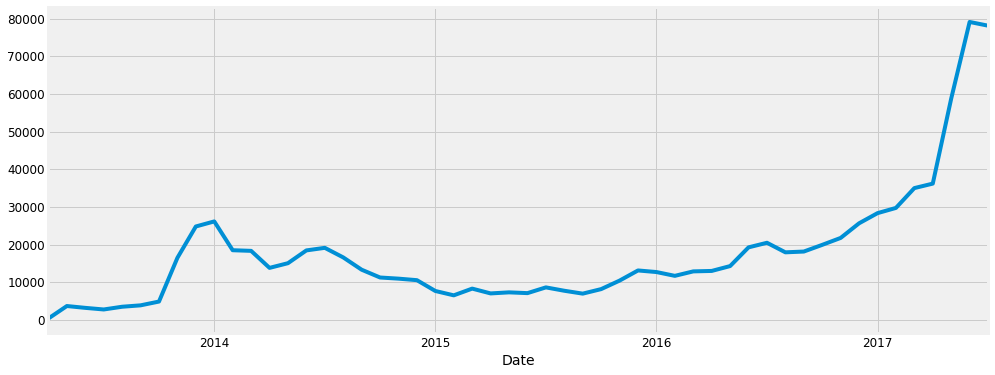

In [20]:
y= data['Close']
y.replace('D')
y.mean()
#y = data['Close'].resample('D').mean()
y.plot(figsize=(15, 6))
plt.show()
#y

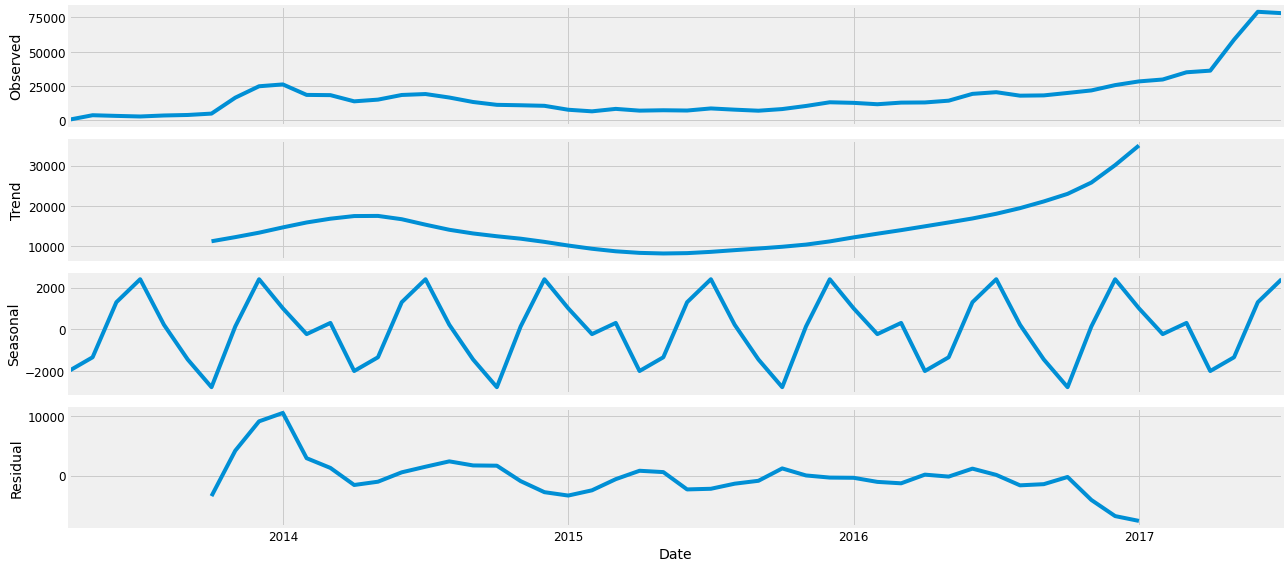

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
#data["Date"]=pd.to_datetime(data["Date"])
#y = pd.to_numeric(y)
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

## Modelo de Machine Learning

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2],12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1174.824361708774
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:901.5517375155707
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:880.4030246508203


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/

ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:1456.4290184265324
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:900.4784528337018
ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:829.3627895557236
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:639.7302568740388


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:999.2539043597075
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1136.251977713241
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:844.8474244005603
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:825.3770236074505
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:nan
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:886.8258305782692


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:841.3532201203725
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:613.5007679441071


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/

ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:2217.5728812594493
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1000.3473949117679
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:762.4476630370259
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:764.7436785527855


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:1155.306942292661
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:780.8944014430875
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:761.186007755934
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:545.7503915045033


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:1170.0240571329928
ARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:968.7347856350491
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:730.5020671377699
ARIMA(0, 1, 1)x(0, 1, 0, 12) - AIC:735.5989568865625


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC:1152.9514605546717
ARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:768.7502866366909
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:728.8527200393202
ARIMA(0, 1, 1)x(1, 1, 0, 12) - AIC:539.1399394857159


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/

ARIMA(0, 1, 1)x(1, 1, 1, 12) - AIC:862.4379426917751
ARIMA(1, 0, 0)x(0, 0, 0, 12) - AIC:1011.8469848008732
ARIMA(1, 0, 0)x(0, 0, 1, 12) - AIC:772.8695742244397
ARIMA(1, 0, 0)x(0, 1, 0, 12) - AIC:782.7453956480491


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(0, 1, 1, 12) - AIC:1391.1143311870608
ARIMA(1, 0, 0)x(1, 0, 0, 12) - AIC:772.6503600769747
ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:769.5308719074585
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:540.6380708564419


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:1124.865411189796
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:987.4335922338557
ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:749.3946208986534


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:756.5629179536273


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:992.3238165768328
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:768.5503021900729
ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:747.853236878167
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:539.9413278071967


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:970.7358877597558
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:990.0670772819561
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:753.4328359005087
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:756.4967080550877


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:1200.3404725710486
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:752.8665928384441
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:747.2388992962949
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:522.2089567935607


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/

ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:1093.9739201344528
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:970.3901434540007
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:732.4697196865455
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:737.0484213908633
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:1156.4043005490778
ARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:750.8226323175725


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:716.3123282591303
ARIMA(1, 1, 1)x(1, 1, 0, 12) - AIC:521.5860017552234


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC:1131.3000626953174


In [24]:
mod = sm.tsa.statespace.SARIMAX(y,
                                #order=(1, 1, 1),  #original
                                #seasonal_order=(1, 1, 0, 12), #original
                                order=(1, 1, 1),#
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0195      0.788     -0.025      0.980      -1.565       1.526
ma.L1          0.6591      0.589      1.118      0.264      -0.496       1.814
ar.S.L12      -0.0401      1.338     -0.030      0.976      -2.663       2.583
sigma2      2.321e+07   3.77e+06      6.162      0.000    1.58e+07    3.06e+07


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


## Evaluación

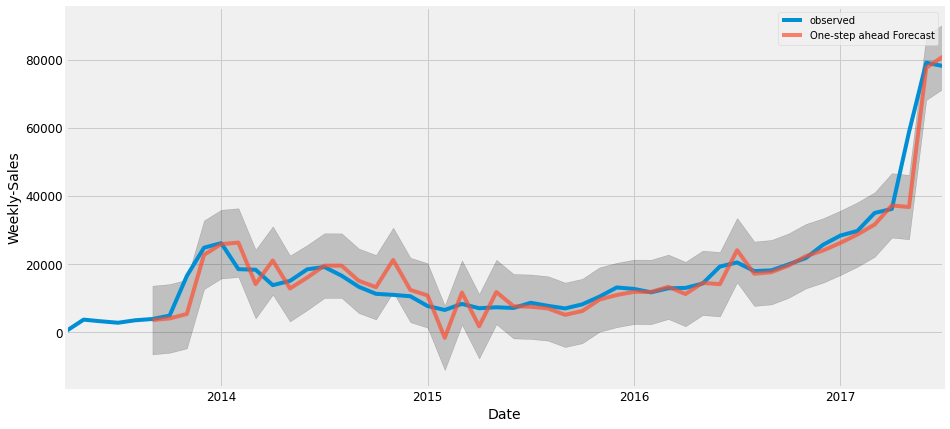

In [26]:
pred = results.get_prediction(start=pd.to_datetime('2013-09-30'), dynamic=False)#2015-04-30
pred_ci = pred.conf_int()
ax = y['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Weekly-Sales')
plt.legend()
plt.show()

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-04-30':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 22303130.73


In [ ]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 4722.62


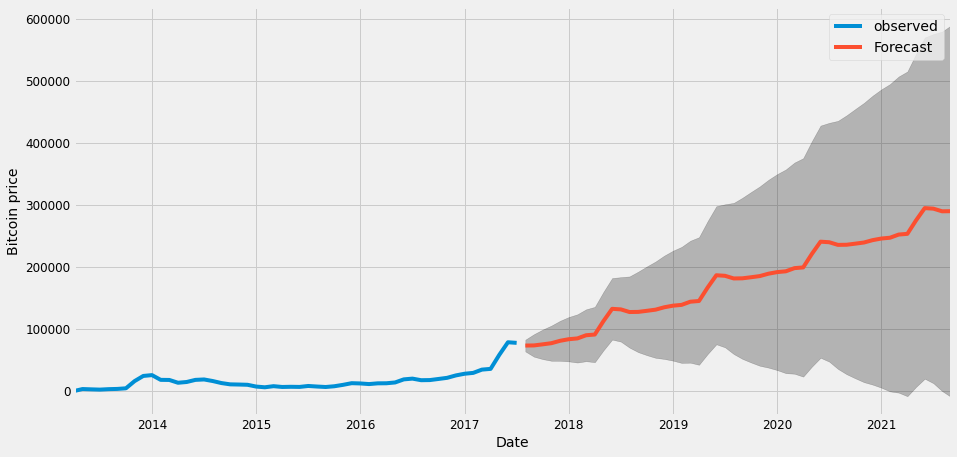

In [ ]:
#pred_uc = results.get_forecast(steps=100)
pred_uc = results.get_forecast(pd.to_datetime('2021-09-30'))
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Bitcoin price')
plt.legend()
plt.show()

In [ ]:
pred_ci

lower Close    upper Close
2017-08-31  64332.760274   83218.508845
2017-09-30  55846.001779   92116.058497
2017-10-31  51962.977602   99500.970895
2017-11-30  49284.996324  105893.173576
2017-12-31  49214.036483  113627.584641
2018-01-31  48303.205402  119673.540607
2018-02-28  46427.313819  124134.097989
2018-03-31  48594.510747  132158.641001
2018-04-30  47004.007225  136040.985072
2018-05-31  66130.504658  160322.876871
2018-06-30  83399.437772  182479.317374
2018-07-31  80174.822802  183912.193604
2018-08-31  70454.546693  185123.582702
2018-09-30  63179.327572  192809.826894
2018-10-31  58276.345824  201216.595507
2018-11-30  54046.009068  209159.814055
2018-12-31  52237.000704  218636.098428
2019-01-31  49526.040640  226492.215797
2019-02-28  45836.884537  232773.757765
2019-03-31  46206.732793  242608.774520
2019-04-30  42839.614379  248271.183076
2019-05-31  60253.550844  274334.135764
2019-06-30  75834.527826  298228.017529
2019-07-31  70928.527220  301335.193107
2019-08-31  60185.499240  303563.563963
2019-09-30  52335.684018  311824.394869
2019-10-31  46540.901675  321122.887884
2019-11-30  41243.794525  330132.930584
2019-12-31  38261.731308  340782.116321
2020-01-31  34312.621252  349875.981075
2020-02-29  29346.225633  357434.452749
2020-03-31  28416.396348  368568.620331
2020-04-30  23738.701176  375541.467210
2020-05-31  39837.326099  402916.982508
2020-06-30  54105.243602  428121.937891
2020-07-31  47892.884852  432535.755988
2020-08-31  36206.018605  435708.196669
2020-09-30  27658.478418  444666.752917
2020-10-31  21041.337513  454787.607551
2020-11-30  14839.392943  464702.485514
2020-12-31  10893.439735  476315.567400
2021-01-31   5938.095199  486415.682792
2021-02-28    -64.774712  495010.641191
2021-03-31  -2052.371167  507202.597079
2021-04-30  -7802.440061  515247.823237
2021-05-31   7214.344765  543705.288946
2021-06-30  20394.779121  569997.807170
2021-07-31  13092.268001  575501.766225
2021-08-31    553.767692  579525.831676
2021-09-30  -8686.645604  589177.261017

## Resultados

El dataset venía con datos por día, por lo tanto se ajustaron para que fuera por meses. El resultado final fue que el modelo generado se ajusta casi perfecto a los datos registrados y las predicciones se pueden hacer ingresando a cuantos meses se quiere predecir o ingresando una fecha que corresponda al último día del mes.

In [ ]:
'''import pickle
with open('bitcoin.sav','wb') as f:
    pickle.dump(pred,f)'''

import pickle
filename = 'bitcoin'
pickle.dump(results, open(filename, 'wb'))